In [871]:
!pip install pyforest

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [872]:
import pyforest

In [873]:
dataset=pd.read_csv("/content/adult_data.csv")


<IPython.core.display.Javascript object>

In [874]:
dataset.columns

Index(['age', ' workclass', ' fnlwgt', ' education', ' education-num',
       ' marital-status', ' occupation', ' relationship', ' race', ' sex',
       ' capital-gain', ' capital-loss', ' hours-per-week', ' native-country',
       ' salary'],
      dtype='object')

In [875]:
dataset.shape

(32561, 15)

In [876]:
dataset.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [877]:
dataset.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [878]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              32561 non-null  int64 
 1    workclass       32561 non-null  object
 2    fnlwgt          32561 non-null  int64 
 3    education       32561 non-null  object
 4    education-num   32561 non-null  int64 
 5    marital-status  32561 non-null  object
 6    occupation      32561 non-null  object
 7    relationship    32561 non-null  object
 8    race            32561 non-null  object
 9    sex             32561 non-null  object
 10   capital-gain    32561 non-null  int64 
 11   capital-loss    32561 non-null  int64 
 12   hours-per-week  32561 non-null  int64 
 13   native-country  32561 non-null  object
 14   salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [879]:
edu_dict=dataset[" education"].value_counts().to_dict()
edu_num_dict=dataset[" education-num"].value_counts().to_dict()
edu_dict_keys=edu_dict.keys()
edu_num_dict_keys=edu_num_dict.keys()

In [880]:
Education=dict(zip(edu_dict_keys,edu_num_dict_keys))

In [881]:
Education

{' HS-grad': 9,
 ' Some-college': 10,
 ' Bachelors': 13,
 ' Masters': 14,
 ' Assoc-voc': 11,
 ' 11th': 7,
 ' Assoc-acdm': 12,
 ' 10th': 6,
 ' 7th-8th': 4,
 ' Prof-school': 15,
 ' 9th': 5,
 ' 12th': 8,
 ' Doctorate': 16,
 ' 5th-6th': 3,
 ' 1st-4th': 2,
 ' Preschool': 1}

In [882]:
dataset=dataset.drop([" education"],axis=1)
dataset=dataset.drop([" relationship"],axis=1)

In [883]:
dataset.isnull().sum()

age                0
 workclass         0
 fnlwgt            0
 education-num     0
 marital-status    0
 occupation        0
 race              0
 sex               0
 capital-gain      0
 capital-loss      0
 hours-per-week    0
 native-country    0
 salary            0
dtype: int64

<IPython.core.display.Javascript object>

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


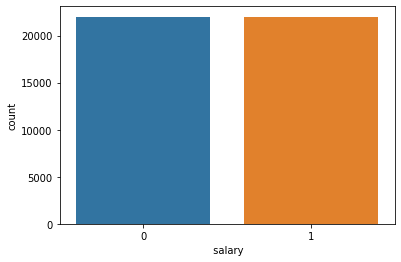

In [884]:
sns.countplot(y)

In [885]:
discrete_features=[feature for feature in dataset.columns if dataset[feature].dtypes=="O"]
print(discrete_features)

[' workclass', ' marital-status', ' occupation', ' race', ' sex', ' native-country', ' salary']


In [886]:
dataset[' salary']=pd.get_dummies(dataset[" salary"],drop_first=True)

<IPython.core.display.Javascript object>

In [887]:
dataset.head(10)

,age,workclass,fnlwgt,education-num,marital-status,occupation,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,13,Never-married,Adm-clerical,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,13,Married-civ-spouse,Exec-managerial,White,Male,0,0,13,United-States,0
2,38,Private,215646,9,Divorced,Handlers-cleaners,White,Male,0,0,40,United-States,0
3,53,Private,234721,7,Married-civ-spouse,Handlers-cleaners,Black,Male,0,0,40,United-States,0
4,28,Private,338409,13,Married-civ-spouse,Prof-specialty,Black,Female,0,0,40,Cuba,0
5,37,Private,284582,14,Married-civ-spouse,Exec-managerial,White,Female,0,0,40,United-States,0
6,49,Private,160187,5,Married-spouse-absent,Other-service,Black,Female,0,0,16,Jamaica,0
7,52,Self-emp-not-inc,209642,9,Married-civ-spouse,Exec-managerial,White,Male,0,0,45,United-States,1
8,31,Private,45781,14,Never-married,Prof-specialty,White,Female,14084,0,50,United-States,1
9,42,Private,159449,13,Married-civ-spouse,Exec-managerial,White,Male,5178,0,40,United-States,1


In [888]:
dataset[" workclass"].value_counts().sort_values(ascending=False)

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name:  workclass, dtype: int64

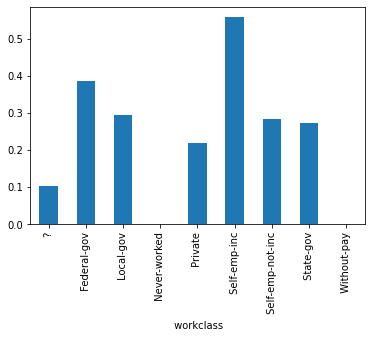

In [889]:
dataset.groupby([" workclass"])[" salary"].mean().plot.bar()

In [890]:
work=dataset.groupby([" workclass"])[" salary"].mean().to_dict()

In [891]:
dataset[" workclass"]=dataset[" workclass"].map(work)

In [892]:
dataset[" marital-status"].value_counts().sort_values(ascending=False)

 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name:  marital-status, dtype: int64

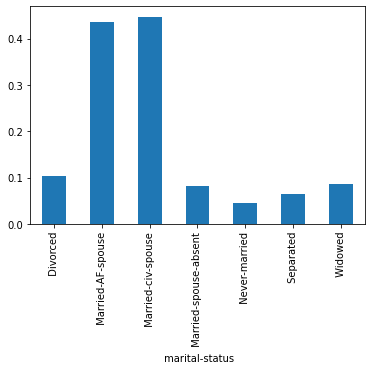

In [893]:
dataset.groupby([" marital-status"])[" salary"].mean().plot.bar()

In [894]:
maritial=dataset.groupby([" marital-status"])[" salary"].mean().to_dict()

In [895]:
dataset[" marital-status"]=dataset[" marital-status"].map(maritial)

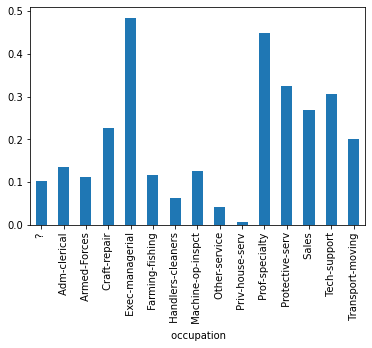

In [896]:
dataset[" occupation"].value_counts().sort_values(ascending=False)
dataset.groupby([" occupation"])[" salary"].mean().plot.bar()


In [897]:
job=dataset.groupby([" occupation"])[" salary"].mean().to_dict()

In [898]:
dataset[" occupation"]=dataset[" occupation"].map(job)

In [899]:
dataset[" race"].value_counts()

 White                 27816
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name:  race, dtype: int64

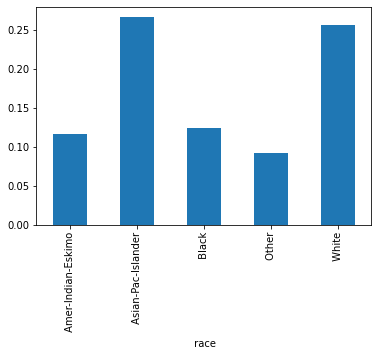

In [900]:
dataset.groupby([" race"])[" salary"].mean().plot.bar()

In [901]:
Race=dataset.groupby([" race"])[" salary"].mean().to_dict()

In [902]:
dataset[" race"]=dataset[" race"].map(Race)

In [903]:
dataset[" sex"]=pd.get_dummies(dataset[" sex"],drop_first=True)

<IPython.core.display.Javascript object>

In [904]:
country=dataset[" native-country"].value_counts().to_dict()

In [905]:
dataset[" native-country"]=dataset[" native-country"].map(country)

In [906]:
dataset.head(10)

,age,workclass,fnlwgt,education-num,marital-status,occupation,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,0.271957,77516,13,0.045961,0.134483,0.25586,1,2174,0,40,29170,0
1,50,0.284927,83311,13,0.446848,0.484014,0.25586,1,0,0,13,29170,0
2,38,0.218673,215646,9,0.104209,0.062774,0.25586,1,0,0,40,29170,0
3,53,0.218673,234721,7,0.446848,0.062774,0.12388,1,0,0,40,29170,0
4,28,0.218673,338409,13,0.446848,0.449034,0.12388,0,0,0,40,95,0
5,37,0.218673,284582,14,0.446848,0.484014,0.25586,0,0,0,40,29170,0
6,49,0.218673,160187,5,0.081340,0.041578,0.12388,0,0,0,16,81,0
7,52,0.284927,209642,9,0.446848,0.484014,0.25586,1,0,0,45,29170,1
8,31,0.218673,45781,14,0.045961,0.449034,0.25586,0,14084,0,50,29170,1
9,42,0.218673,159449,13,0.446848,0.484014,0.25586,1,5178,0,40,29170,1


In [907]:
x=dataset.drop([" salary"],axis=1)
y=dataset[" salary"]

In [908]:
x.shape,y.shape

((32561, 12), (32561,))

In [909]:
from imblearn.combine import SMOTETomek
x,y=SMOTETomek().fit_resample(x,y)

In [910]:
x.shape,y.shape

((44042, 12), (44042,))

In [911]:
features=list(x.columns)

In [912]:
for i in features:
  IQR=x[i].quantile(0.75)-x[i].quantile(0.25)
  lower=x[i].quantile(0.25)-(1.5*IQR)
  upper=x[i].quantile(0.75)+(1.5*IQR)
  x.loc[x[i]>upper,i]=upper
  x.loc[x[i]<lower,i]=lower

In [913]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.70,random_state=42)

In [914]:
from sklearn.feature_selection import SelectKBest,mutual_info_classif
mi=mutual_info_classif(x_train,y_train)


In [915]:
select10=SelectKBest(mutual_info_classif,k=10)
select10.fit(x_train,y_train)
column=x_train.columns[select10.get_support()]

In [916]:
dataset.columns

Index(['age', ' workclass', ' fnlwgt', ' education-num', ' marital-status',
       ' occupation', ' race', ' sex', ' capital-gain', ' capital-loss',
       ' hours-per-week', ' native-country', ' salary'],
      dtype='object')

In [917]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [918]:
param= {'penalty':['none','l2','l1','elasticnet'],
                         'tol':[0.1,0.0001,0.001,0.5,1],
                        'C':[0.001,0.01,0.1,0.5,1]}

        
        

In [919]:
from sklearn.model_selection import RandomizedSearchCV
random_search=RandomizedSearchCV(model,param_distributions=param,n_iter=20,n_jobs=-1,scoring="roc_auc",cv=10,verbose=0)

In [920]:
random_search.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
90 fits failed out of a total of 200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 449, in _check_solver
    % (solver, penalty)
ValueError: Solve

RandomizedSearchCV(cv=10, estimator=LogisticRegression(), n_iter=20, n_jobs=-1,
                   param_distributions={'C': [0.001, 0.01, 0.1, 0.5, 1],
                                        'penalty': ['none', 'l2', 'l1',
                                                    'elasticnet'],
                                        'tol': [0.1, 0.0001, 0.001, 0.5, 1]},
                   scoring='roc_auc')

In [928]:
random_search.best_estimator_

LogisticRegression(C=0.1, penalty='none')

In [929]:
model=LogisticRegression(C=0.1, penalty='none')
model.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


LogisticRegression(C=0.1, penalty='none')

In [930]:
y_pred=model.predict(x_test)

In [931]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [932]:
print(accuracy_score(y_test,y_pred))

0.49909179370742784


In [933]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.50      0.70      0.58     15335
           1       0.50      0.30      0.38     15495

    accuracy                           0.50     30830
   macro avg       0.50      0.50      0.48     30830
weighted avg       0.50      0.50      0.48     30830



In [927]:
print(confusion_matrix(y_test,y_pred))

[[10687  4648]
 [10795  4700]]
